In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
boston = pd.read_csv('listings.csv')

In [4]:
boston = boston[['host_is_superhost', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews']]

In [5]:
boston

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews
0,f,Entire home/apt,4,1.5,2.0,3.0,$250.00,0
1,f,Private room,2,1.0,1.0,1.0,$65.00,36
2,t,Private room,2,1.0,1.0,1.0,$65.00,41
3,f,Private room,4,1.0,1.0,2.0,$75.00,1
4,t,Private room,2,1.5,1.0,2.0,$79.00,29
...,...,...,...,...,...,...,...,...
3580,f,Private room,3,1.0,1.0,1.0,$69.00,4
3581,f,Private room,2,1.0,1.0,1.0,$150.00,0
3582,f,Entire home/apt,4,1.0,1.0,1.0,$198.00,0
3583,f,Private room,2,1.0,1.0,1.0,$65.00,2


In [6]:
boston["room_type"] = boston["room_type"].astype('category')
boston["room_type_cat"] = boston["room_type"].cat.codes

boston["host_is_superhost"] = boston["host_is_superhost"].astype('category')
boston["superhost_cat"] = boston["host_is_superhost"].cat.codes

## House Type Label Encoding
0 Entire home/apt

1 Private room

2 Shared room

## Superhost Label Encoding
0 false

1 true

In [7]:
boston = boston.drop(['room_type', 'host_is_superhost'], axis = 1)

In [8]:
boston['price'] = boston.price.replace({'\$':''}, regex = True)

In [9]:
boston.head()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,room_type_cat,superhost_cat
0,4,1.5,2.0,3.0,250.00,0,0,0
1,2,1.0,1.0,1.0,65.00,36,1,0
2,2,1.0,1.0,1.0,65.00,41,1,1
3,4,1.0,1.0,2.0,75.00,1,1,0
4,2,1.5,1.0,2.0,79.00,29,1,1


In [10]:
boston['price_float'] = boston['price'].str.replace(',', '').astype(float)

In [11]:
boston['price_float'].astype(int)

0       250
1        65
2        65
3        75
4        79
       ... 
3580     69
3581    150
3582    198
3583     65
3584     65
Name: price_float, Length: 3585, dtype: int32

In [12]:
boston['price_float'].max()

4000.0

In [13]:
boston = boston.drop(columns = 'price')

In [14]:
boston.head()

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,room_type_cat,superhost_cat,price_float
0,4,1.5,2.0,3.0,0,0,0,250.0
1,2,1.0,1.0,1.0,36,1,0,65.0
2,2,1.0,1.0,1.0,41,1,1,65.0
3,4,1.0,1.0,2.0,1,1,0,75.0
4,2,1.5,1.0,2.0,29,1,1,79.0


In [15]:
boston_no_na = boston.dropna()
boston_no_na

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,room_type_cat,superhost_cat,price_float
0,4,1.5,2.0,3.0,0,0,0,250.0
1,2,1.0,1.0,1.0,36,1,0,65.0
2,2,1.0,1.0,1.0,41,1,1,65.0
3,4,1.0,1.0,2.0,1,1,0,75.0
4,2,1.5,1.0,2.0,29,1,1,79.0
...,...,...,...,...,...,...,...,...
3580,3,1.0,1.0,1.0,4,1,0,69.0
3581,2,1.0,1.0,1.0,0,1,0,150.0
3582,4,1.0,1.0,1.0,0,0,0,198.0
3583,2,1.0,1.0,1.0,2,1,0,65.0


In [16]:
X = boston_no_na.drop('price_float',axis =1).values
y = boston_no_na['price_float'].values


#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train2 = s_scaler.fit_transform(X_train2.astype(np.float))
X_test2 = s_scaler.transform(X_test2.astype(np.float))

In [18]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
# having 5 neuron is based on the number of available features
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train2.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [20]:
model.fit(x=X_train2,y=y_train2,
          validation_data=(X_test2,y_test2),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
26/26 [==============================] - 4s 10ms/step - loss: 53068.5352 - val_loss: 46522.8086
Epoch 2/400
26/26 [==============================] - 0s 2ms/step - loss: 52976.6094 - val_loss: 46399.3242
Epoch 3/400
26/26 [==============================] - 0s 2ms/step - loss: 52759.5117 - val_loss: 46113.2305
Epoch 4/400
26/26 [==============================] - 0s 2ms/step - loss: 52228.6289 - val_loss: 45404.9258
Epoch 5/400
26/26 [==============================] - 0s 2ms/step - loss: 50942.6250 - val_loss: 43718.2109
Epoch 6/400
26/26 [==============================] - 0s 2ms/step - loss: 47886.5859 - val_loss: 39992.8438
Epoch 7/400
26/26 [==============================] - 0s 2ms/step - loss: 41695.4219 - val_loss: 33097.3867
Epoch 8/400
26/26 [==============================] - 0s 2ms/step - loss: 31968.4980 - val_loss: 24014.3027
Epoch 9/400
26/26 [==============================] - 0s 2ms/step - loss: 22843.6973 - val_loss: 18516.4883
Epoch 10/400
26/26 [================

<AxesSubplot:>

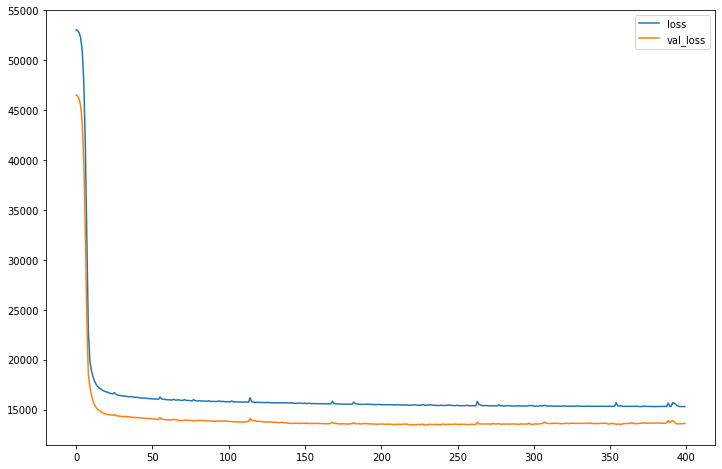

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 54.16225949833902
MSE: 13597.006288493225
RMSE: 116.60620175828224
VarScore: 0.27298640276524233


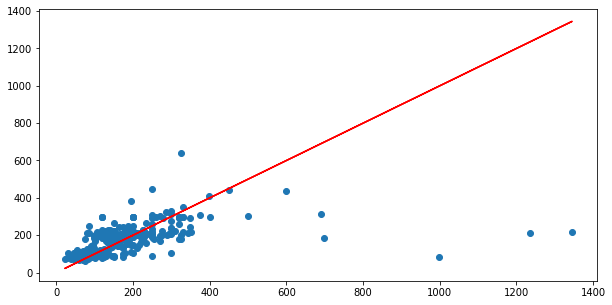

In [22]:
y_pred2 = model.predict(X_test2)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))  
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('VarScore:',metrics.explained_variance_score(y_test2,y_pred2))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test2,y_pred2)
# Perfect predictions
plt.plot(y_test2,y_test2,'r')

In [39]:
model.predict([[ 2, 1,  1, 2,  39,
        1, 0]])


array([[153.94292]], dtype=float32)

In [40]:
model.save('models/my_model')

INFO:tensorflow:Assets written to: models/my_model\assets
